# Deep Fake Image Detection Using XceptionNet

Install tenserflow version 2.16.1


In [1]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [4]:
model_path = './Models/xception_deepfake_image.h5'

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Classification Value -: 0.99924666


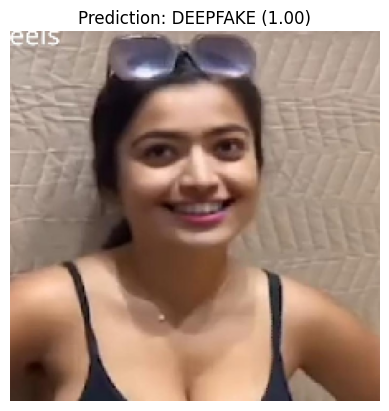

In [6]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the model
model = load_model(model_path)

# Load and preprocess your input data
image_path = './Inputs/images/Rashmika_fake.jpg'   #input your image

# Load the image
image = cv2.imread(image_path)

# Check if image loading was successful
if image is None:
    print(f"Error: Unable to load image from path '{image_path}'")
    exit()

# Resize the image to match the input size of your model
input_size = (224, 224)
resized_image = cv2.resize(image, input_size)

# Normalize the resized image
normalized_image = resized_image / 255.0

# Add a batch dimension
input_image = np.expand_dims(normalized_image, axis=0)

# Make predictions using the loaded model
predictions = model.predict(input_image)

# Interpret the predictions
prediction_value = predictions[0][0]  # Assuming predictions are for a single image (batch size of 1)
print("Classification Value -:",prediction_value)
threshold = 0.5  # Threshold for binary classification (adjust as needed)

# Determine the classification label and confidence
if prediction_value >= threshold:
    classification_label = "DEEPFAKE"
    confidence = prediction_value
else:
    classification_label = "REAL"
    confidence = 1 - prediction_value

# Display the image with classification label using matplotlib
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {classification_label} ({confidence:.2f})")
plt.axis('off')  # Turn off axis
plt.show()